Device set to use cpu


Transcribed audio:  ایک لڑکا جس کے نام دولا تھا اور وہ مرگیا تھا
Story: ایک دور کی بات ہے۔ ایک ایسے دیہات میں جہاں گلیوں میں بچے کھیلتے تھے اور آسمان پر بادل اُڑتے تھے، اس دیہات میں ایک لڑکے کا نام دولا تھا۔ دولا نہایت ہی چھوٹا سا لڑکا تھا، لیکن اپنی شرارتوں کے لیے مشہور۔ 

دولا کی ایک عجیب و غریب عادت تھی، وہ کبھی کبھار مر جاتا! ہر بار جب اسے کوئی کام مشکل لگتا تو وہ زمین پر گر کر “مرگیا” کہ لیتا۔ اس طرح وہ اپنے کاموں سے بچ جاتا اور اُس کے والدین بھی دولا کی یہ شرارت دیکھ کر ہنستے رہتے۔

ایک دن، دولا کو اپنی چھوٹی بہن کی طرف سے ایک کھلنا پڑا۔ دولا نے کچھ سوچا اور پھر وہ زمین پر گر کر “مرگیا” کہ لیا۔ اس بار دولا کی شرارت ناکام ہو گئی، کیونکہ اس کے والدین نے سمجھا کہ واقعی کوئی آفت واقع ہوئی ہے۔



Audio file path: synthesized_audio/dummy3.wav


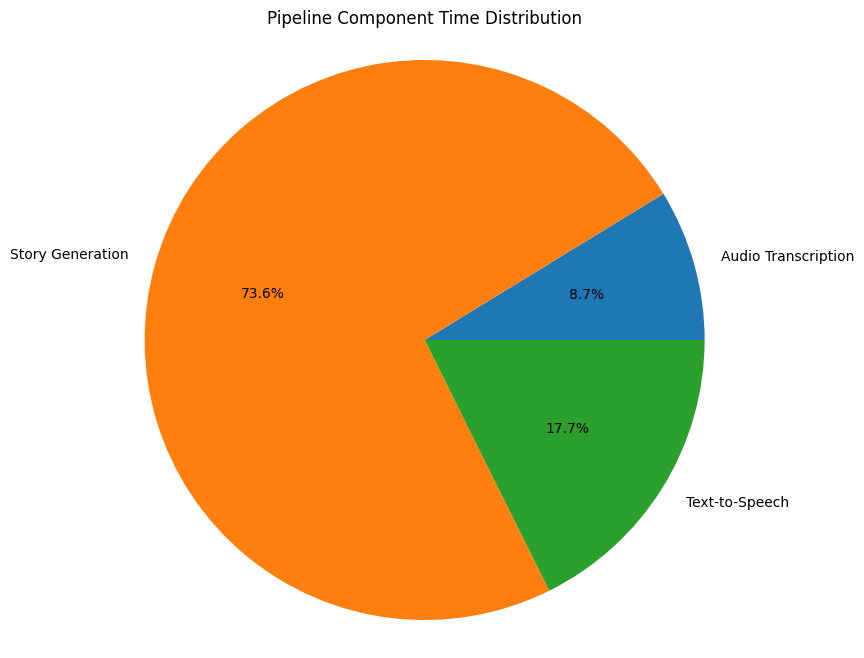

{'status': 'success',
 'message': 'Pipeline processed successfully',
 'file_id': 'dummy3',
 'audio_url': '/get-audio/dummy3',
 'story': 'ایک دور کی بات ہے۔ ایک ایسے دیہات میں جہاں گلیوں میں بچے کھیلتے تھے اور آسمان پر بادل اُڑتے تھے، اس دیہات میں ایک لڑکے کا نام دولا تھا۔ دولا نہایت ہی چھوٹا سا لڑکا تھا، لیکن اپنی شرارتوں کے لیے مشہور۔ \n\nدولا کی ایک عجیب و غریب عادت تھی، وہ کبھی کبھار مر جاتا! ہر بار جب اسے کوئی کام مشکل لگتا تو وہ زمین پر گر کر “مرگیا” کہ لیتا۔ اس طرح وہ اپنے کاموں سے بچ جاتا اور اُس کے والدین بھی دولا کی یہ شرارت دیکھ کر ہنستے رہتے۔\n\nایک دن، دولا کو اپنی چھوٹی بہن کی طرف سے ایک کھلنا پڑا۔ دولا نے کچھ سوچا اور پھر وہ زمین پر گر کر “مرگیا” کہ لیا۔ اس بار دولا کی شرارت ناکام ہو گئی، کیونکہ اس کے والدین نے سمجھا کہ واقعی کوئی آفت واقع ہوئی ہے۔\n\n\n'}

In [2]:
import requests
import json
from app.utils.audio.tts.audio_synthesis import translate_text_to_audio
from app.utils.audio.asr.translate_audio import transcribe_audio
import time
import matplotlib.pyplot as plt


def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        return result, end_time - start_time
    return wrapper

@measure_time
def transcribe_audio_wrapper(file_path):
    return transcribe_audio(file_path)


@measure_time
def translate_text_to_audio_wrapper(text, file_id):
    return translate_text_to_audio(text, file_id)

def visualize_pipeline_components(timings):
    labels = ['Audio Transcription', 'Story Generation', 'Text-to-Speech']
    sizes = [t for t in timings]

    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Pipeline Component Time Distribution')
    plt.show()

@measure_time
def query_llama_with_ollama(system_prompt, user_prompt):
    """
    Sends a prompt to LLaMA 3.2 via Ollama and streams the response.
    """
    url = "http://localhost:11434/api/generate"
    full_prompt = f"{system_prompt}\n\n{user_prompt}"
    payload = {
        "model": "gemma2",
        "prompt": full_prompt,
        "stream": False,
    }

    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            decoded_response = response.json()
            if 'response' in decoded_response:
                return decoded_response['response']
            else:
                return "Error: No response field in the returned JSON."
        else:
            print(f"Error: {response.status_code} - {response.text}")
            return f"Error: Failed to get response from LLaMA. Status code: {response.status_code}"
    except requests.exceptions.RequestException as e:
        print(f"Request error: {e}")
        return f"Error: An error occurred while making the request."
        
def process_pipeline(file_path: str, file_id: str):
    try:
        timings = []
        transcribed_audio , time_taken = transcribe_audio_wrapper(file_path)
        timings.append(time_taken)
        if not transcribed_audio:
            raise Exception("Error transcribing audio")
        print(f"Transcribed audio: {transcribed_audio}")
        system_prompt = """You are a storytelling AI assistant that writes stories in Urdu script.
        You need to write a creative story in Urdu based on the topic and theme provided by the user.
        Make the story interesting and fluent, and do not use any words outside of the Urdu script.
        Limit the story to a maximum length of 200 words.
        Always start the story with a proper introduction.
        Never end the story abruptly, and always conclude it logically.
        Absolutely never include a word that is not in Urdu font."""

        theme = "comedic"
        topic = "  [ ایک شرارتی بلی] "

        user_prompt = f"""Theme: [{theme}]
        موضوع: [{transcribed_audio}]
        اب اردو رسم الخط میں کہانی لکھیں:"""

        story,time_taken_story =  query_llama_with_ollama(system_prompt, user_prompt)
        print(f"Story: {story}")
        timings.append(time_taken_story)

        audio_file_path,time_taken_audio = translate_text_to_audio_wrapper(story, file_id)
        timings.append(time_taken_audio)

        if not audio_file_path:
            raise Exception("Error translating text to audio")
        print(f"Audio file path: {audio_file_path}")

        visualize_pipeline_components(timings)
        response = {
            "status": "success",
            "message": "Pipeline processed successfully",
            "file_id": file_id,
            # URL to download the audio file Add the server URL before this in the frontend
            "audio_url": f"/get-audio/{file_id}",
            "story": story,
        }

        return response

    except Exception as e:
        print(f"Error processing pipeline: {e}")
        response = {
            "status": "error",
            "message": "Error processing pipeline",
            "error": str(e)
        }
        return response

process_pipeline("test.ogg", "dummy3")